In [1]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [64]:
%cd /glade/scratch/gmarques/OM4_025
%ls

/glade/scratch/gmarques/OM4_025
19000101.ocean_Agulhas_section.nc.0045
19000101.ocean_Agulhas_section.nc.0069
19000101.ocean_Agulhas_section.nc.0093
19000101.ocean_Agulhas_section.nc.0117
19000101.ocean_Agulhas_section.nc.0141
19000101.ocean_Agulhas_section.nc.0165
19000101.ocean_annual.nc
19000101.ocean_annual_rho2.nc
19000101.ocean_annual_z.nc
19000101.ocean_Barents_opening.nc.0380
19000101.ocean_Barents_opening.nc.0404
19000101.ocean_Barents_opening.nc.0428
19000101.ocean_Barents_opening.nc.0452
19000101.ocean_Bering_Strait.nc.0368
19000101.ocean_daily.nc
19000101.ocean_Davis_Strait.nc.0375
19000101.ocean_Davis_Strait.nc.0376
19000101.ocean_Denmark_Strait.nc.0377
19000101.ocean_Denmark_Strait.nc.0378
19000101.ocean_Drake_Passage.nc.0039
19000101.ocean_Drake_Passage.nc.0063
19000101.ocean_Drake_Passage.nc.0087
19000101.ocean_Drake_Passage.nc.0111
19000101.ocean_English_Channel.nc.0332
19000101.ocean_Faroe_Scotland.nc.0355
19000101.ocean_Faroe_Scotland.nc.0379
19000101.ocean_Florida_B

In [66]:
ds

<xarray.Dataset>
Dimensions:                 (nv: 2, time: 1, xh: 1440, xq: 1440, yh: 1080, yq: 1080, zi: 76, zl: 75)
Coordinates:
  * xh                      (xh) float64 -299.7 -299.5 -299.2 ... 59.78 60.03
  * yh                      (yh) float64 -80.39 -80.31 -80.23 ... 89.84 89.95
  * time                    (time) object 1900-01-02 00:00:00
  * nv                      (nv) float64 1.0 2.0
  * zi                      (zi) float64 0.0 2.0 4.0 ... 3.722e+03 6.5e+03
  * zl                      (zl) float64 1.0 3.0 5.0 ... 3.591e+03 5.111e+03
  * xq                      (xq) float64 -299.6 -299.3 -299.1 ... 59.91 60.16
  * yq                      (yq) float64 -80.35 -80.27 -80.19 ... 89.89 90.0
Data variables:
    Rd_dx                   (time, yh, xh) float32 ...
    obvfsq                  (time, zi, yh, xh) float32 ...
    rhopot2                 (time, zl, yh, xh) float32 ...
    volcello                (time, zl, yh, xh) float32 ...
    pbo                     (time, yh, xh) float32 ...
    pso                     (time, yh, xh) float32 ...
    zos                     (time, yh, xh) float32 ...
    zossq                   (time, yh, xh) float32 ...
    tos                     (time, yh, xh) float32 ...
    tossq                   (time, yh, xh) float32 ...
    tob                     (time, yh, xh) float32 ...
    sos                     (time, yh, xh) float32 ...
    sossq                   (time, yh, xh) float32 ...
    sob                     (time, yh, xh) float32 ...
    mlotst                  (time, yh, xh) float32 ...
    mlotstsq                (time, yh, xh) float32 ...
    mlotstmin               (time, yh, xh) float32 ...
    mlotstmax               (time, yh, xh) float32 ...
    T_adx_2d                (time, yh, xq) float32 ...
    T_ady_2d                (time, yq, xh) float32 ...
    S_adx_2d                (time, yh, xq) float32 ...
    S_ady_2d                (time, yq, xh) float32 ...
    umo_2d                  (time, yh, xq) float32 ...
    vmo_2d                  (time, yq, xh) float32 ...
    prlq                    (time, yh, xh) float32 ...
    prsn                    (time, yh, xh) float32 ...
    evs                     (time, yh, xh) float32 ...
    friver                  (time, yh, xh) float32 ...
    ficeberg                (time, yh, xh) float32 ...
    fsitherm                (time, yh, xh) float32 ...
    wfo                     (time, yh, xh) float32 ...
    net_massout             (time, yh, xh) float32 ...
    net_massin              (time, yh, xh) float32 ...
    sfdsi                   (time, yh, xh) float32 ...
    hfrainds                (time, yh, xh) float32 ...
    hfevapds                (time, yh, xh) float32 ...
    hfrunoffds              (time, yh, xh) float32 ...
    hfsnthermds             (time, yh, xh) float32 ...
    hfsifrazil              (time, yh, xh) float32 ...
    hfibthermds             (time, yh, xh) float32 ...
    rlntds                  (time, yh, xh) float32 ...
    hflso                   (time, yh, xh) float32 ...
    hfsso                   (time, yh, xh) float32 ...
    rsntds                  (time, yh, xh) float32 ...
    rsdo                    (time, zi, yh, xh) float32 ...
    hfds                    (time, yh, xh) float32 ...
    net_heat_coupler        (time, yh, xh) float32 ...
    heat_content_massin     (time, yh, xh) float32 ...
    heat_content_massout    (time, yh, xh) float32 ...
    heat_content_surfwater  (time, yh, xh) float32 ...
    heat_content_fprec      (time, yh, xh) float32 ...
    heat_content_cond       (time, yh, xh) float32 ...
    LwLatSens               (time, yh, xh) float32 ...
    Heat_PmE                (time, yh, xh) float32 ...
    nonpenSW                (time, yh, xh) float32 ...
    tauuo                   (time, yh, xq) float32 ...
    tauvo                   (time, yq, xh) float32 ...
    ustar                   (time, yh, xh) float32 ...
    temp_layer_ave          (time, zl) float32 ...
    salt_layer_ave    

In [70]:

grid=xr.open_dataset('19000101.ocean_static.nc')
lon=grid['geolon'].values; lat=grid['geolat'].values
ds = xr.open_dataset('19000101.ocean_month.nc')
Rd_dx=ds['Rd_dx'][0,:,:]
sos=ds['sos'][0,:,:]


lon[np.isnan(lon)]=0.0
lat[np.isnan(lat)]=0.0
#Rd_dx[np.isnan(lon)]=0.0; Rd_dx[np.isnan(lat)]=0.0

In [72]:
print(Rd_dx[500,500])

<xarray.DataArray 'Rd_dx' ()>
array(9.96921e+36)
Coordinates:
    xh       float64 -175.6
    yh       float64 -0.75
    time     object 1900-01-02 00:00:00
Attributes:
    long_name:      Ratio between deformation radius and grid spacing
    units:          m m-1
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT


In [34]:
Rd_dx[Rd_dx>1e10]=np.nan

In [35]:
print(Rd_dx.shape)
print(lon.shape)
print(lat.shape)

(1080, 1440)
(1080, 1440)
(1080, 1440)


In [37]:
Rd_dx

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [11]:
np.max(lon)

60.03369

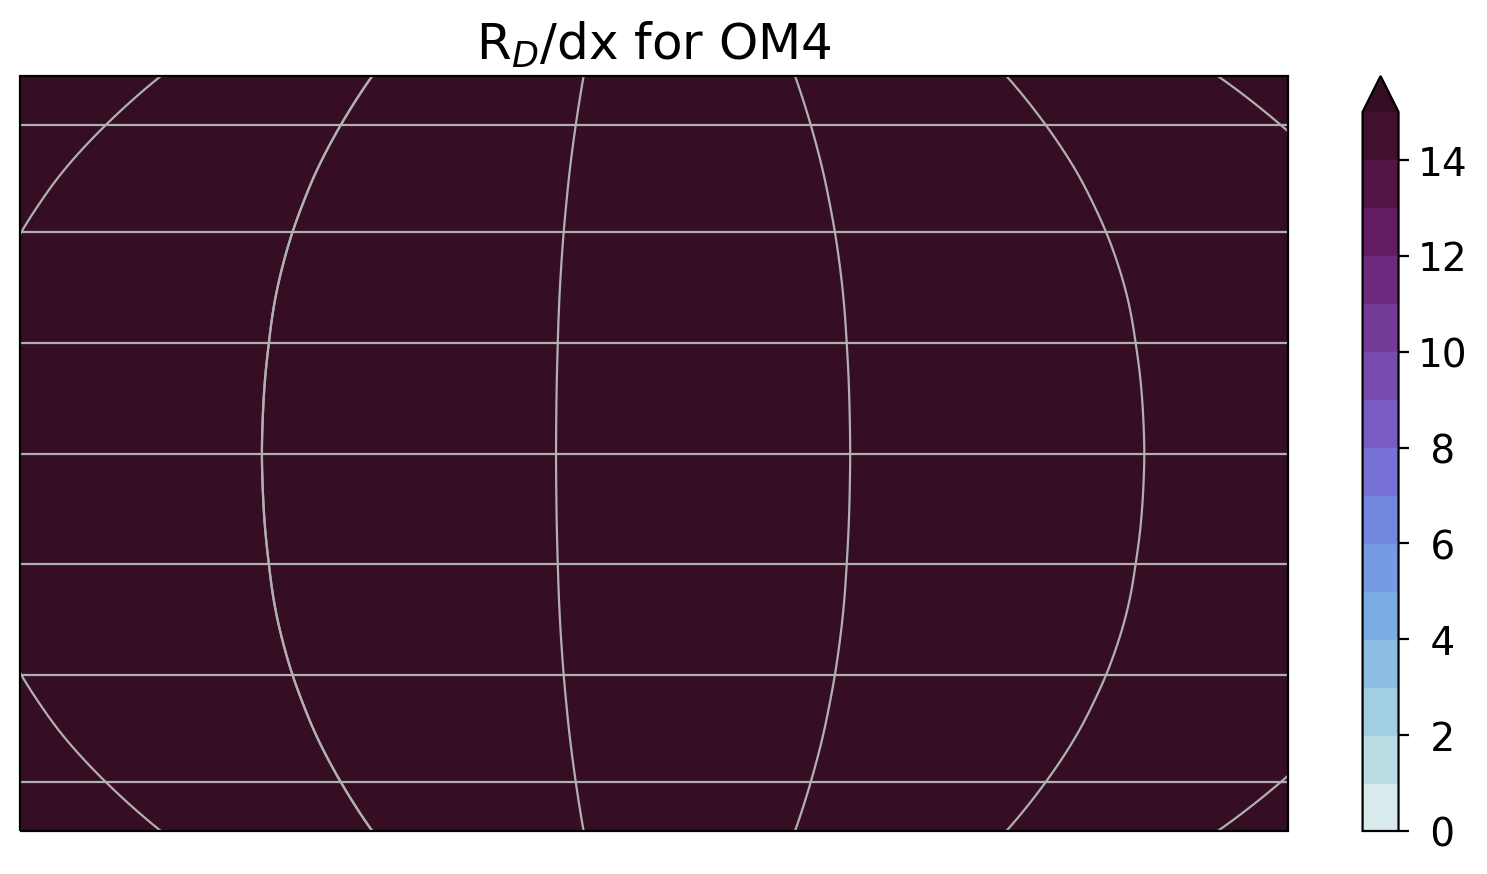

In [14]:
fig = plt.figure(figsize=(12, 5), dpi= 200, facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-100)) #-140 is default
ax.set_extent([-400,-40,-70, 70],ccrs.PlateCarree())

levels=np.linspace(0,15,16)
plt.contourf(lon,lat,Rd_dx,levels=levels,transform=ccrs.PlateCarree(),cmap=cmocean.cm.dense,extend='max');


cbar=plt.colorbar(fraction=0.046, pad=0.04,format='%2.1d'); cbar.ax.tick_params(labelsize=14);
CS=plt.contour(lon, lat,Rd_dx,levels = [2],transform=ccrs.PlateCarree(),
                 colors=('r',),linestyles=('-',),linewidths=(2,))
ax.clabel(CS, fmt = '%2.1d', colors = 'r', fontsize=14)

gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('R$_D$/dx for OM4',fontsize=18) #positive into ocean
ax.background_patch.set_facecolor('grey')

Text(0.5, 1.0, 'R$_D$/dx for OM4')

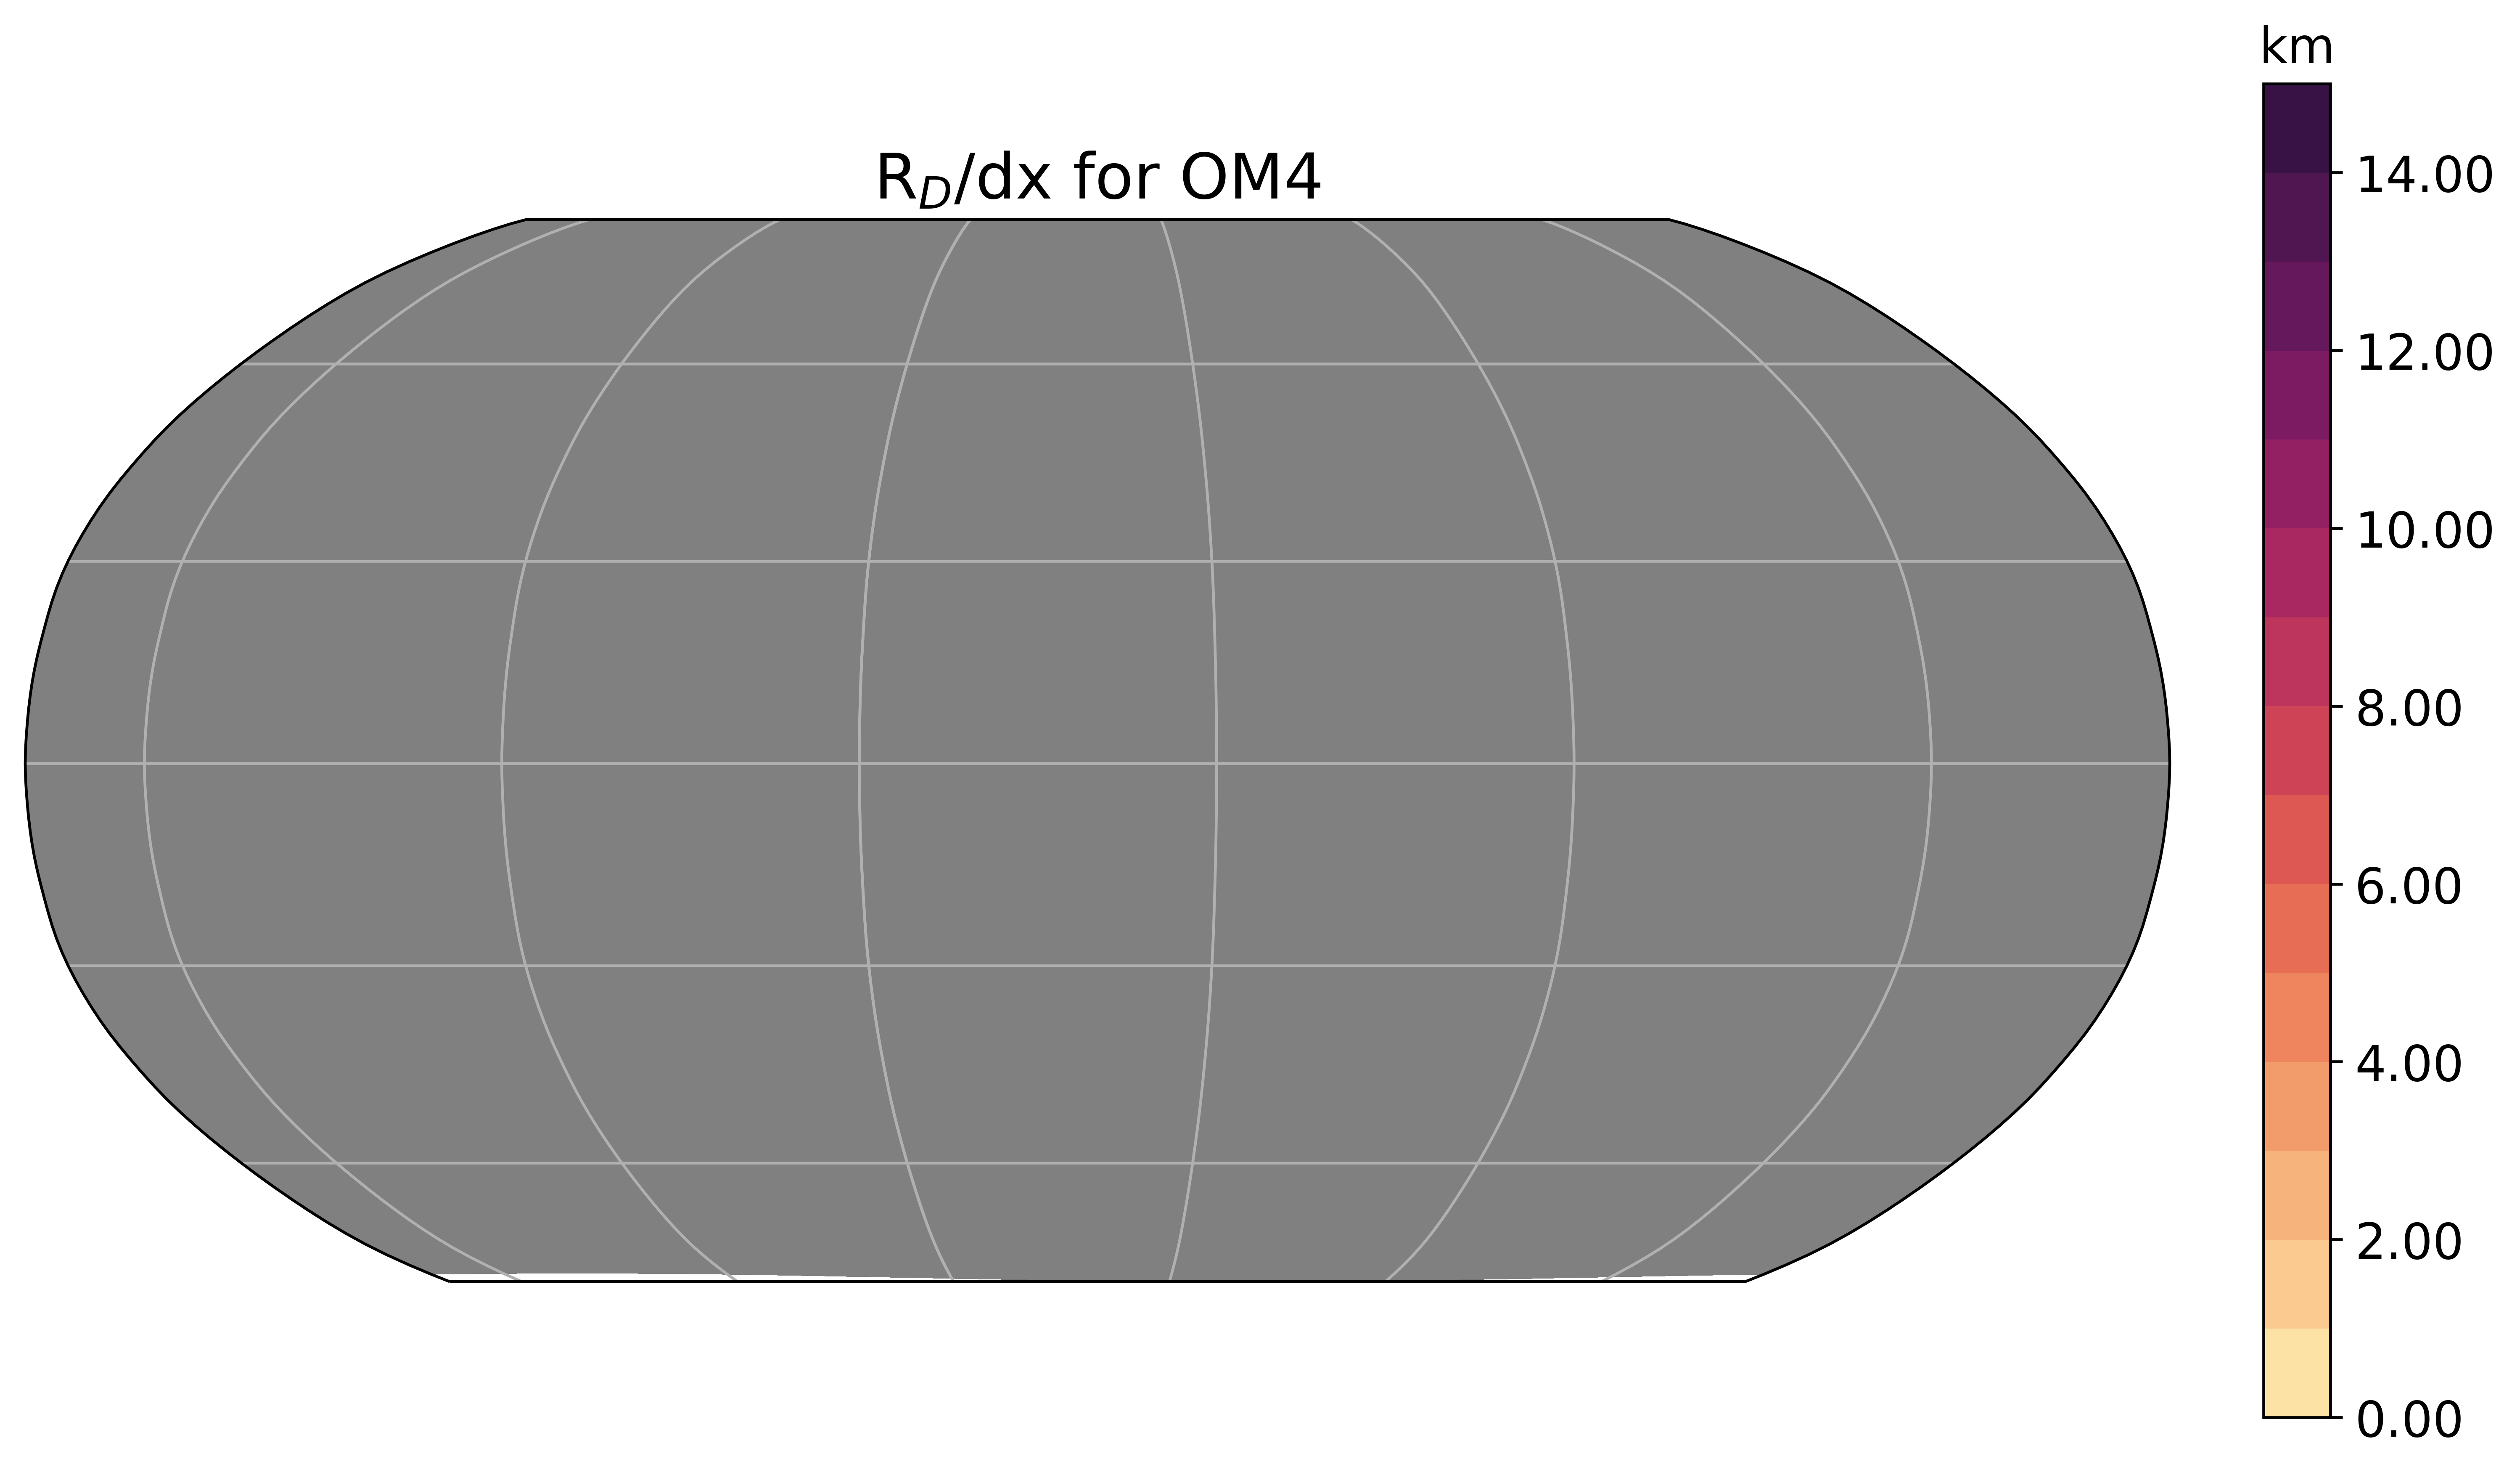

In [38]:
fig = plt.figure(figsize=(12, 7), dpi= 600, facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-140))

levels=np.linspace(0,15,16)
plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.contourf(lon,lat,Rd_dx,levels=levels,transform=ccrs.PlateCarree(),cmap=cmocean.cm.matter);


cbar=plt.colorbar(fraction=0.046, pad=0.04,format='%.2f'); cbar.ax.tick_params(labelsize=14);
cbar.ax.set_title('km', fontsize=14)

gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('R$_D$/dx for OM4',fontsize=18) 


In [41]:
np.nanmin(Rd_dx)

nan

In [40]:
Rd_dx.max


<function ndarray.max>